# Genetic Feature Selection

This example creates a pipeline where the first step selects a subset of features, and the following step is a graph pipeline

In [1]:
import tpot2
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=100, n_informative=6, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)

n_features = X_train.shape[1]
genetic_feature_selection_search_space = tpot2.search_spaces.nodes.GeneticFeatureSelectorNode(n_features=n_features)
graph_search_space = tpot2.search_spaces.pipelines.GraphPipeline(
    root_search_space= tpot2.config.get_search_space(["KNeighborsClassifier", "LogisticRegression", "DecisionTreeClassifier"]),
    leaf_search_space = None, 
    inner_search_space = tpot2.config.get_search_space(["transformers"]),
    max_size = 10,
)

combined_search_space = tpot2.search_spaces.pipelines.SequentialPipeline([genetic_feature_selection_search_space, graph_search_space])


est = tpot2.TPOTEstimator(population_size=10,generations=5, 
                            scorers=['roc_auc_ovr',tpot2.objectives.complexity_scorer],
                            scorers_weights=[1,-1],
                            n_jobs=32,
                            classification=True,
                            search_space = combined_search_space,
                            verbose=1,
                            )

scorer = sklearn.metrics.get_scorer('roc_auc_ovo')

est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

Generation: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]


0.9377587991718427


In [2]:
est.fitted_pipeline_

Pipeline(steps=[('maskselector',
                 MaskSelector(mask=array([False,  True, False, False, False,  True,  True, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False,  True, False, False, Fa...
        True,  True,  True, False, False,  True,  True, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True]))),
                ('graphpipeline',
                 GraphPipeline(graph=<networkx.classes.digraph.DiGraph object at 0x763168650dc0>))])

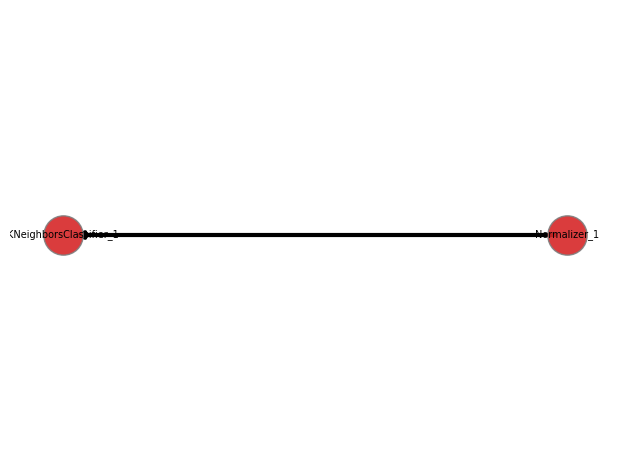

In [3]:
est.fitted_pipeline_.steps[1][1].plot()